In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import plotting
import nilearn.plotting as plotting
import matplotlib.pyplot as plt
from nilearn.maskers import NiftiSpheresMasker
from numpy import genfromtxt

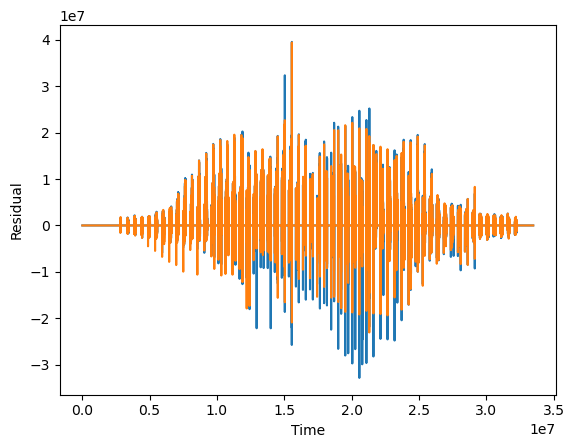

In [2]:
residuals_path ='/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/residuals/residuals_sub-0200100_ses-1.nii.gz'

load_residuals = nib.load(residuals_path)
residuals = np.array(load_residuals.dataobj)       #convert to numpy array
residuals = residuals.reshape(-1, 2)               #get the first volume and a 2D array

plt.plot(residuals) 
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

#check : https://seaborn.pydata.org/examples/residplot.html


Cluster 0 peak[4.06000096 1.3900013  4.33500057]

Cluster 1 peak[-5.83999944  1.3900013   4.63500059]

Cluster 2 peak[ 0.1600008  -5.80999899  5.83500063]

Cluster 3 peak[-0.13999921 -2.80999887  4.9350006 ]

Cluster 4 peak[-0.73999923 -4.60999894  6.13500065]



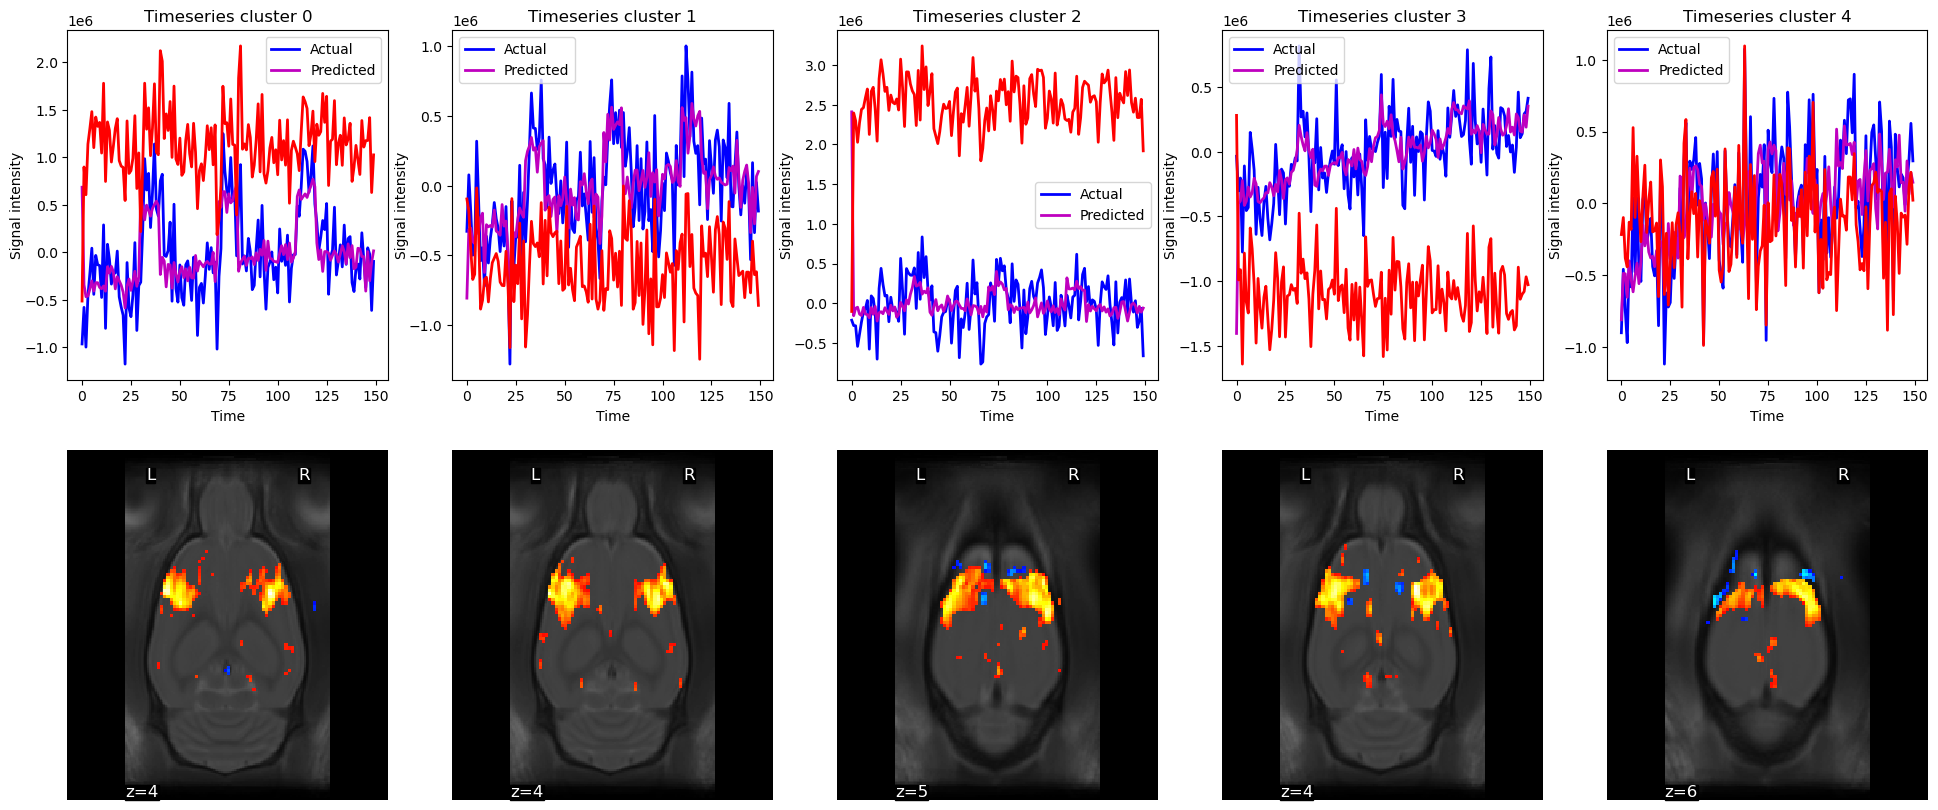

In [3]:
# -- Plot timeseries per cluster -- 

template_path ='/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template.nii'

#Load variables
residuals = genfromtxt('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/residuals/clusters_residuals_sub-0200100_ses-1.csv', delimiter=',')
predicted_timeseries = genfromtxt('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/predicted_timeseries/cluster_predicted_timeseries_sub-0200100_ses-1.csv', delimiter=',')
timeseries = genfromtxt('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/timeseries/cluster_timesries_sub-0200100_ses-1.csv', delimiter=',')
coords = genfromtxt('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/coords/cluster_timesries_sub-0200100_ses-1.csv', delimiter=',')
zscore_map = nib.load('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/z_score/z_score_sub-0200100_ses-1.nii.gz')

#Correct for differences in baseline levels between the predicted and real time series
predicted_mean = np.mean(predicted_timeseries, axis=0)
real_mean = np.mean(timeseries, axis=0)

corrected_predicted = np.subtract(predicted_timeseries, predicted_mean)
corrected_real = np.subtract(timeseries, real_mean)

fig1, axs1 = plt.subplots(2, len(coords))

for i in range(0, len(coords)):
    axs1[0, i].set_title("Timeseries cluster {}".format(i))

    axs1[0, i].plot(corrected_real[:, i], c='b', lw=2, label="Actual")
    axs1[0, i].plot(corrected_predicted[:, i], c="m", ls="-", lw=2, label="Predicted")
    axs1[0, i].plot(residuals[:, i], c='r', lw=2)
    axs1[0, i].legend()

    axs1[0, i].set_xlabel("Time")
    axs1[0, i].set_ylabel("Signal intensity", labelpad=0)
   
   
# plotting image below the time series 
    #To change maps, check:https://www.kaggle.com/code/soham1024/visualization-using-nilearn                      
    roi_img = plotting.plot_stat_map(zscore_map,                            
                                    cut_coords=[coords[i][2]],
                                    threshold=3.1,
                                    figure=fig1,
                                    axes=axs1[1, i],
                                    display_mode="z",
                                    colorbar=False,
                                    bg_img = template_path)
    
    fig1.set_size_inches(24, 10)
    print('Cluster {} peak'.format(i)+f'{coords[i]}\n')

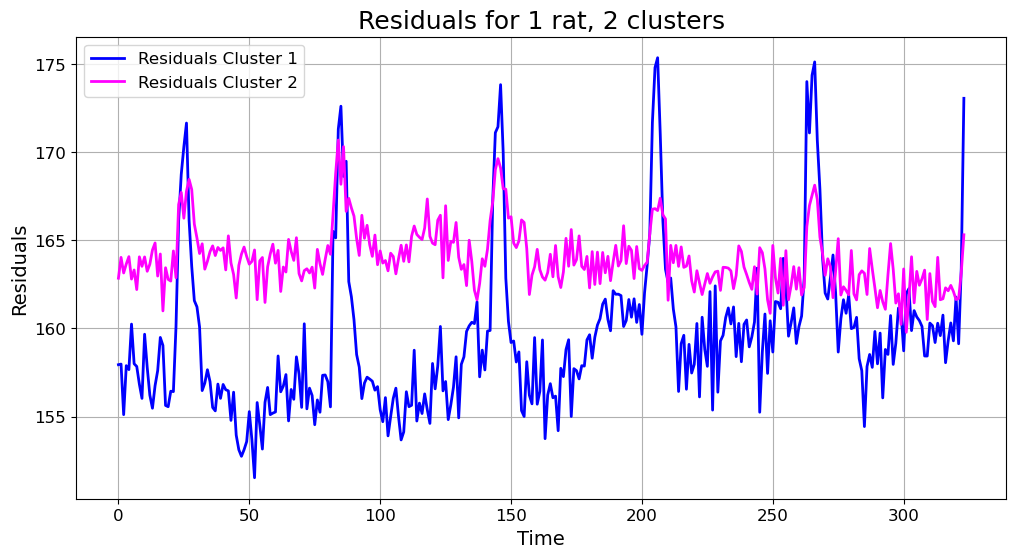

In [97]:
#plot clusters' residuals from first level analysis 

residuals_path = '/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/Residuals_cluster_sub-0200201_ses-1.csv'
residuals = pd.read_csv(residuals_path, sep=',')

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(residuals.to_numpy()[:, 0], color='blue', linewidth=2, label='Residuals Cluster 1')
ax.plot(residuals.to_numpy()[:, 1], color='magenta', linewidth=2, label='Residuals Cluster 2')

# customize the plot
ax.set_title("Residuals for 1 rat, 2 clusters", fontsize=18)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Residuals", fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(True)
ax.legend(fontsize=12)

# display the plot
plt.show()
